# importing libraries 

In [551]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [552]:
#reading dataframe
df=pd.read_csv("Fertilizer_Prediction[2].csv")

In [553]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [554]:
df.shape

(99, 9)

In [555]:
#summary statstics 
df.describe()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


so there is no missing values in dataframe

In [557]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [558]:
df.apply(lambda x: len(x.unique()))

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [559]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [560]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
10-26-26     7
17-17-17     7
Name: Fertilizer Name, dtype: int64

# data visualization

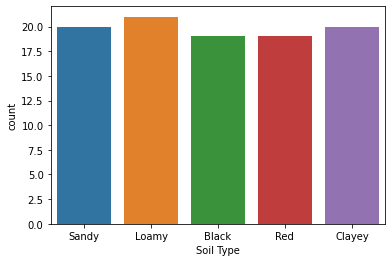

In [561]:
sns.countplot(x='Soil Type', data = df)

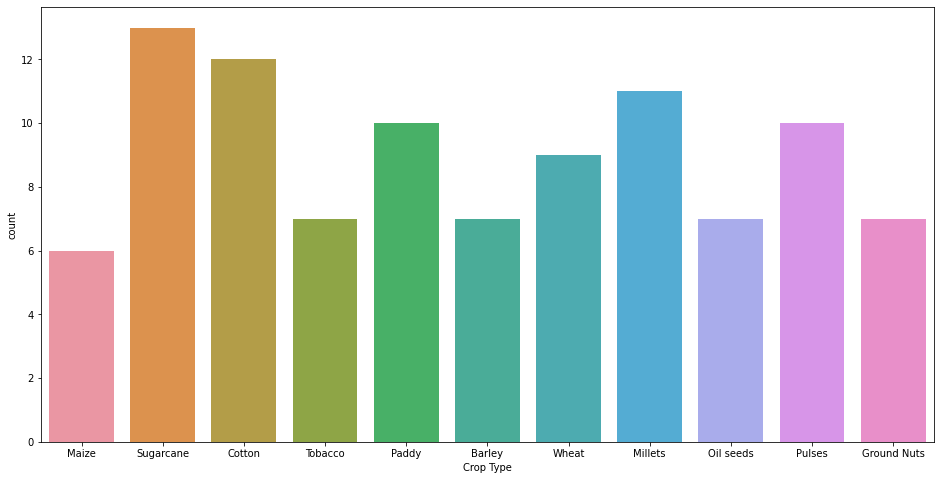

In [562]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

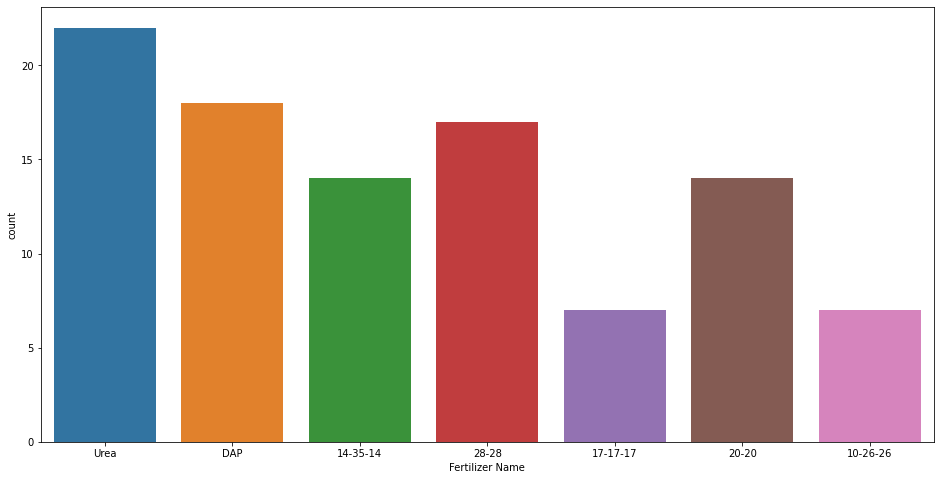

In [563]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

# distribution of variables

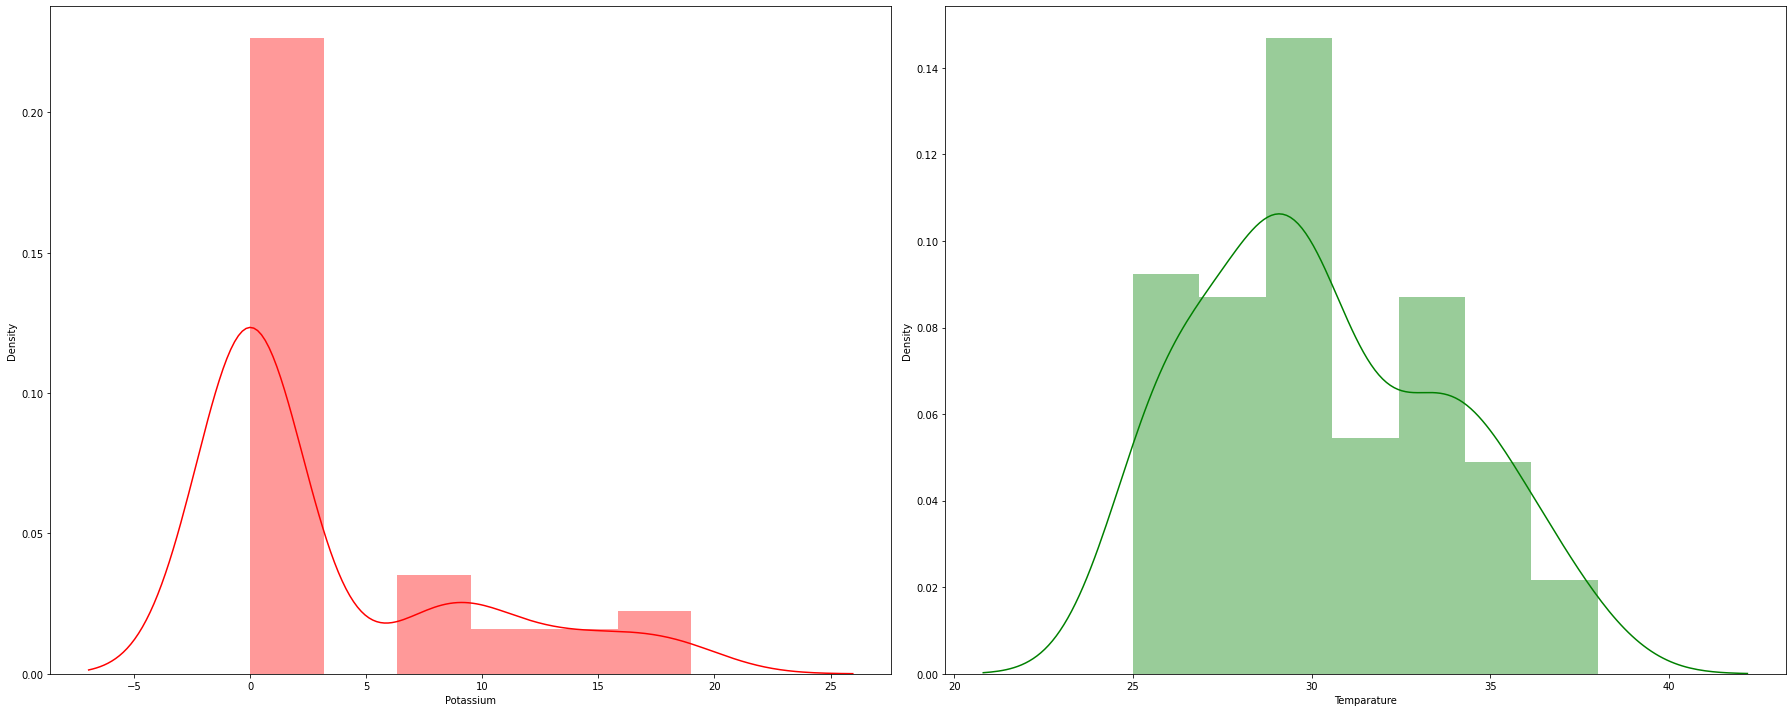

In [564]:
f= plt.figure(figsize=(25,10))
ax=f.add_subplot(121)
sns.distplot(df['Potassium'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(df['Temparature'] , color ='green' , ax = ax)
plt.tight_layout()

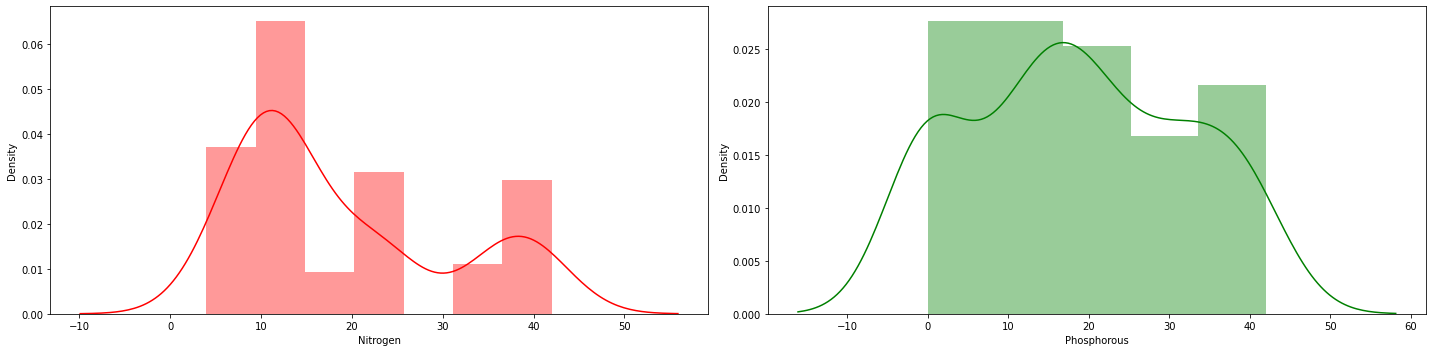

In [565]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(df['Nitrogen'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(df['Phosphorous'] , color ='green' , ax = ax)
plt.tight_layout()

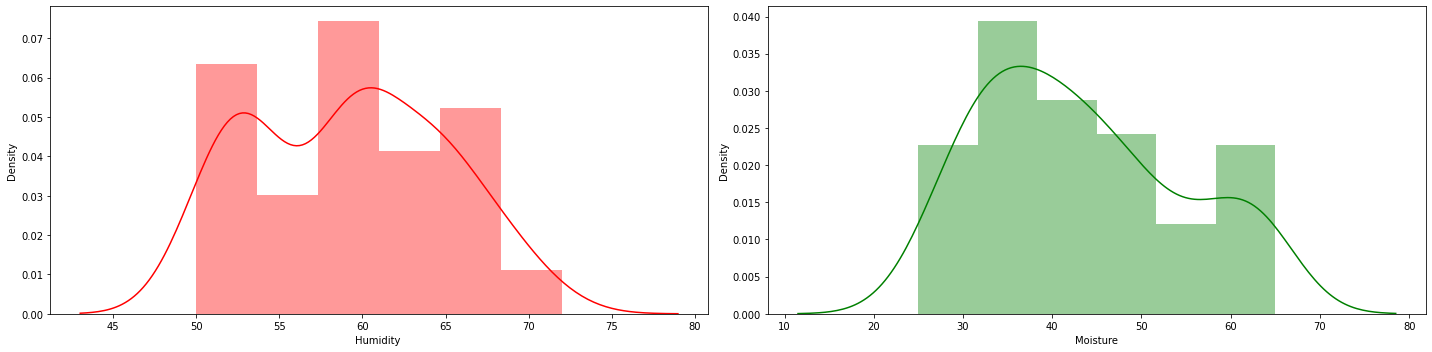

In [566]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(df['Humidity '] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(df['Moisture'] , color ='green' , ax = ax)
plt.tight_layout()

# correlations

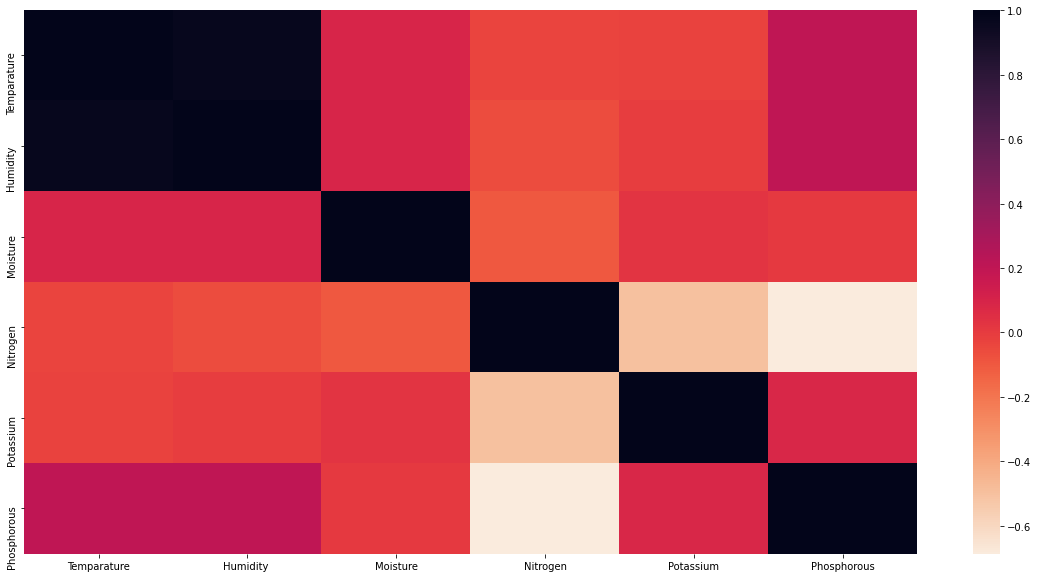

In [567]:
f,ax=plt.subplots(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr , ax=ax ,   cmap="rocket_r")

so here humidity and temperature highly correlated  so we can exclude one of them 

In [568]:
data=df.drop("Temparature",axis=1,index=None)

In [569]:
data.head()


,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,52,38,Sandy,Maize,37,0,0,Urea
1,52,45,Loamy,Sugarcane,12,0,36,DAP
2,65,62,Black,Cotton,7,9,30,14-35-14
3,62,34,Red,Tobacco,22,0,20,28-28
4,54,46,Clayey,Paddy,35,0,0,Urea


In [570]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


# univariate analysis

In [571]:
data.columns

Index(['Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen',
       'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

# bivariate analysis 

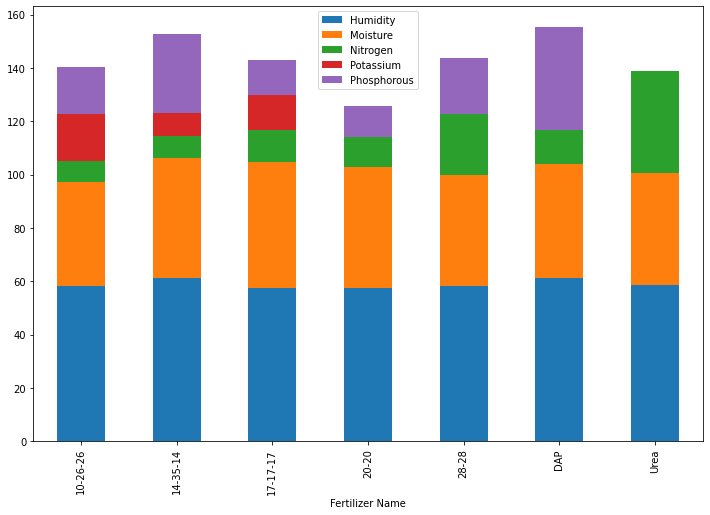

In [572]:
stats_by_fertilizers=data.groupby("Fertilizer Name").mean()[['Humidity ', 'Moisture','Nitrogen', 'Potassium',"Phosphorous"]]
stats_by_fertilizers.plot.bar(stacked=True,figsize=(12,8))


<Figure size 4104x3672 with 0 Axes>

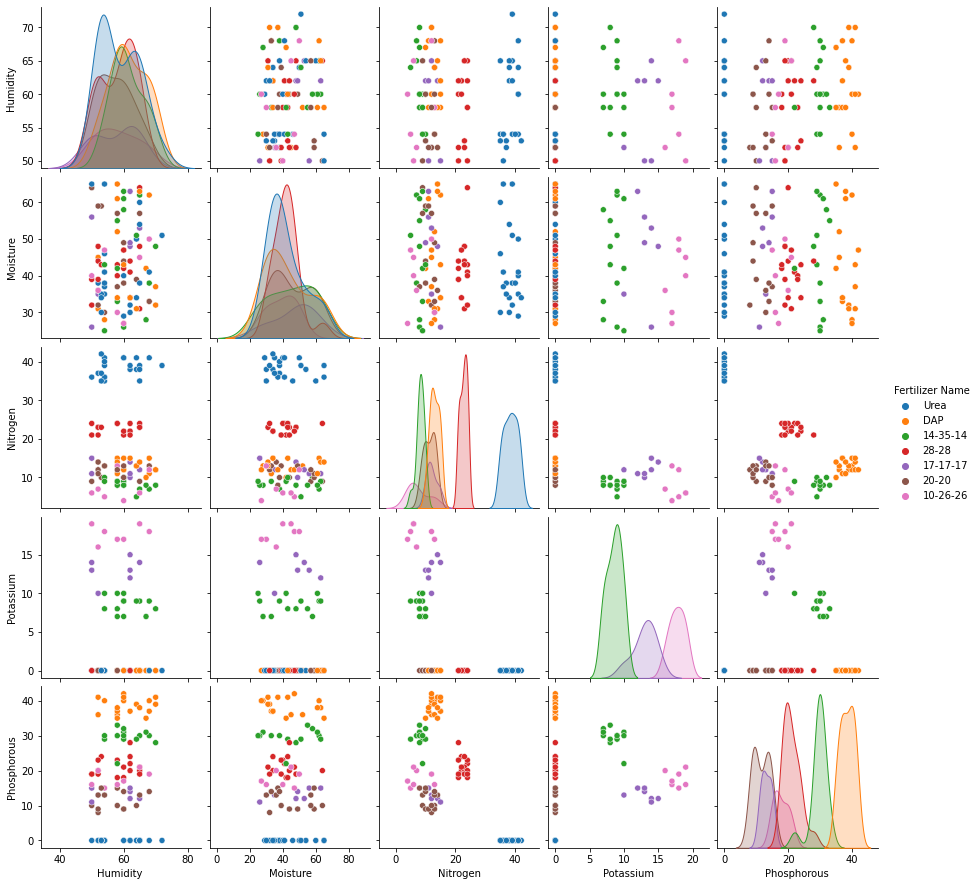

In [573]:
plt.figure(figsize=(57,51))
sns.pairplot(data,hue="Fertilizer Name")
plt.show()

In [574]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

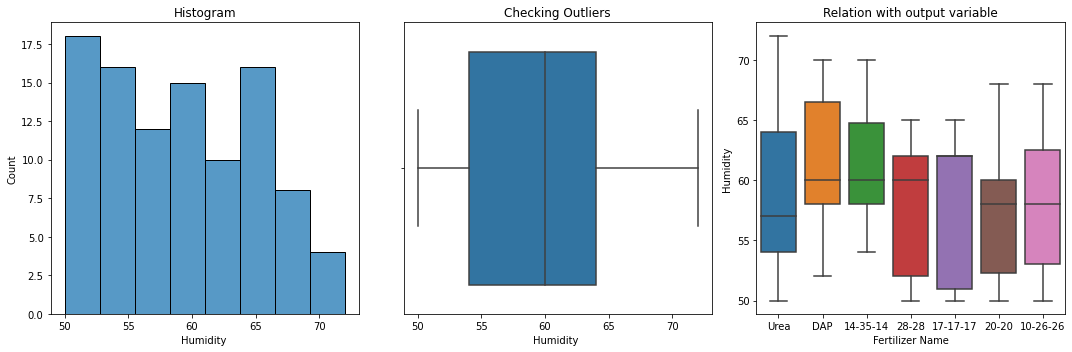

In [575]:
plot_conti(df['Humidity '])

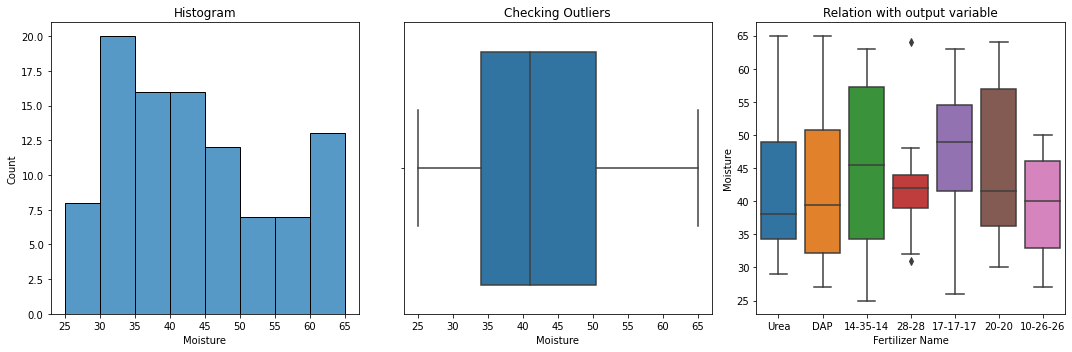

In [576]:
plot_conti(df['Moisture'])

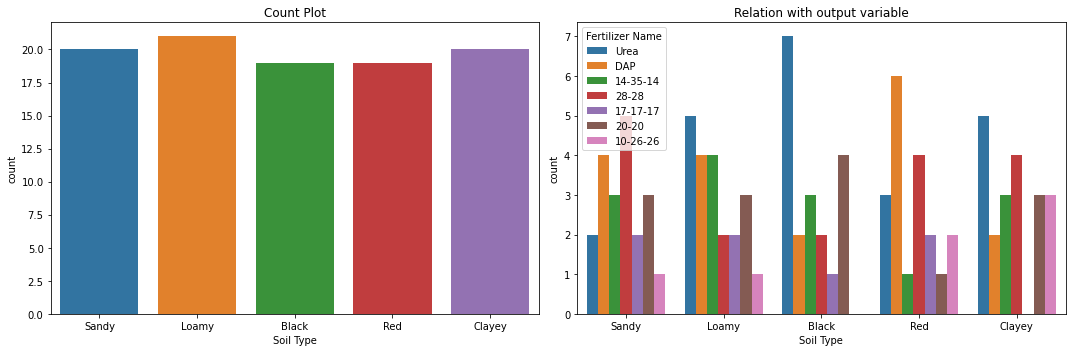

In [577]:
plot_cato(df['Soil Type'])

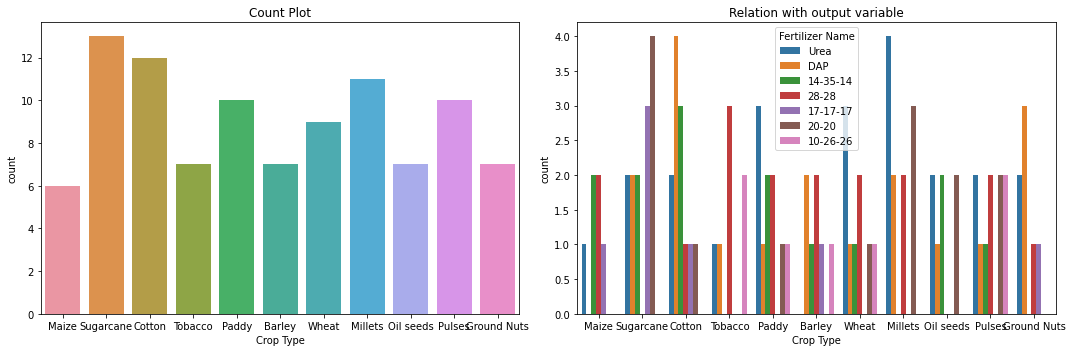

In [578]:
plot_cato(df['Crop Type'])

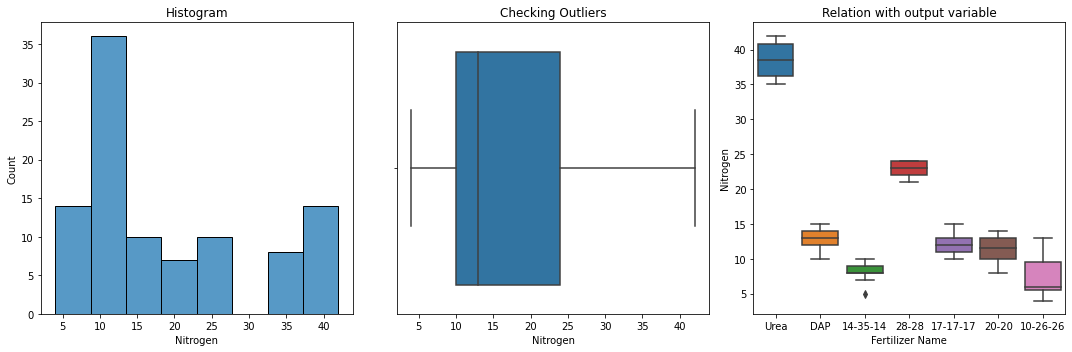

In [579]:
plot_conti(df['Nitrogen'])

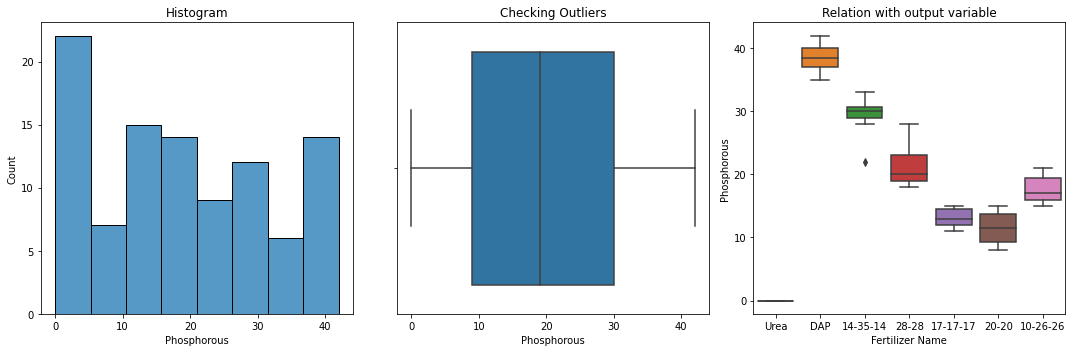

In [580]:
plot_conti(df["Phosphorous"])

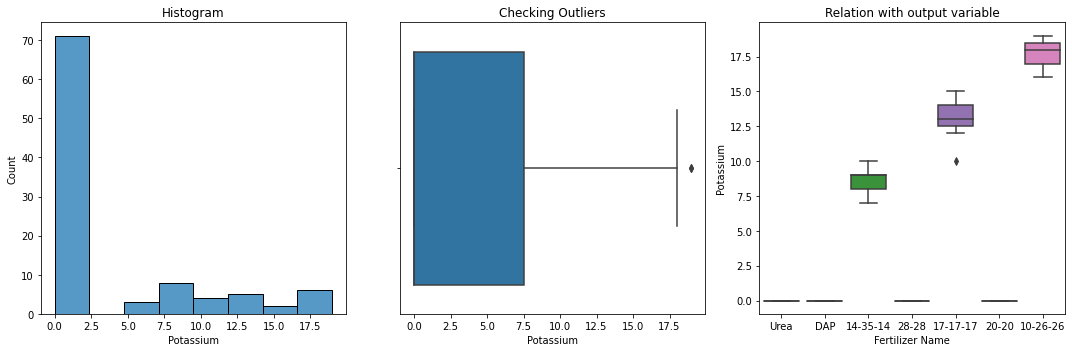

In [581]:
plot_conti(df["Potassium"])

In [582]:
data=data.drop("Potassium",axis=1)
data.head()

,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Phosphorous,Fertilizer Name
0,52,38,Sandy,Maize,37,0,Urea
1,52,45,Loamy,Sugarcane,12,36,DAP
2,65,62,Black,Cotton,7,30,14-35-14
3,62,34,Red,Tobacco,22,20,28-28
4,54,46,Clayey,Paddy,35,0,Urea


# seperating target and features lable

In [583]:
X=data.drop("Fertilizer Name",axis=1).copy( )

In [584]:
X.head()

,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Phosphorous
0,52,38,Sandy,Maize,37,0
1,52,45,Loamy,Sugarcane,12,36
2,65,62,Black,Cotton,7,30
3,62,34,Red,Tobacco,22,20
4,54,46,Clayey,Paddy,35,0


In [585]:
y=data["Fertilizer Name"].copy()

In [586]:
y.head()

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
Name: Fertilizer Name, dtype: object

# covert the data in numeric form

In [587]:

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [588]:
numeric_features = ['Humidity ', 'Moisture','Nitrogen', "Phosphorous"]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Soil Type', 'Crop Type']
categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)], remainder='passthrough')

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.


In [589]:
Model=[]
accuracy=[]

# logistic regression

In [590]:
clf = Pipeline(steps=[('preprocessor', preprocessor),('scaler', StandardScaler()),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

clf.fit(X_train, y_train)
accuracy_clf=cross_val_score(clf,X,y,cv=5).mean()
print(accuracy_clf)
accuracy.append(accuracy_clf)
Model.append("logistic regression")

0.6278947368421053


# random forest

In [591]:
from sklearn.ensemble import RandomForestClassifier

In [592]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [593]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Humidity ', 'Moisture',
                                                   'Nitrogen', 'Phosphorous']),
                          

In [594]:
acc_rfc = cross_val_score(model,X,y,cv=5).mean()
print(acc_rfc)
accuracy.append(acc_rfc)
Model.append("random foreset classifier ")

0.8089473684210526


# guassian naive bayes

In [595]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [596]:
Naivebayes=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('gussianNB', GaussianNB())
])

In [597]:
Naivebayes.fit(X_train,y_train)


predicted_values = Naivebayes.predict(X_test)
accuracy_NV=cross_val_score(Naivebayes,X,y,cv=5).mean()
accuracy.append(accuracy_NV)
Model.append("Naivebayes")

print(accuracy_NV)

0.43473684210526314


# svc

In [598]:
from sklearn.svm import SVC

SVM = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('svc',SVC(gamma=.001))])

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

acc_svm= cross_val_score(SVM,X,y,cv=5).mean()
print("SVM's Accuracy is: ", acc_svm)
accuracy.append(acc_svm)
Model.append("SVC")





SVM's Accuracy is:  0.22210526315789472


NEURAL NETWORK or MLP

In [599]:
from sklearn.neural_network import MLPClassifier

In [600]:
mlp=MLPClassifier(hidden_layer_sizes=[100,100],activation='relu', alpha=0.001)

In [601]:
MLP=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('Mlp',mlp)]).fit(X_train,y_train)
b=MLP.score(X_test,y_test)
accuracy.append(b)
Model.append('Neural Network')
b



0.68

In [602]:
dict(zip(Model,accuracy))

{'Naivebayes': 0.43473684210526314,
 'Neural Network': 0.68,
 'SVC': 0.22210526315789472,
 'logistic regression': 0.6278947368421053,
 'random foreset classifier ': 0.8089473684210526}

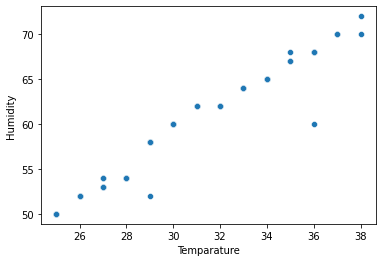

In [603]:
sns.scatterplot(x="Temparature",y="Humidity ",data=df)